# Prediction of Heart Disease Using Machine Learning Algorithms

In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Load the dataset
df = pd.read_csv("Heart_Disease_Prediction Dataset.csv")
df.head()
#https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var.

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [63]:
df.columns

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [64]:
df.shape

(270, 15)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,270.0,134.500000,78.086491,0.0,67.25,134.5,201.75,269.0
Age,270.0,54.433333,9.109067,29.0,48.00,55.0,61.00,77.0
Sex,270.0,0.677778,0.468195,0.0,0.00,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.00,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.00,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.00,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.00,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.00,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.00,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.00,0.0,1.00,1.0


In [67]:
df.describe(include='object').T

,count,unique,top,freq
Heart Disease,270,2,Absence,150


In [68]:
df.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [69]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

The output of the dataset describes the numerical values for Presence and Absence of Heart Disease resulting in 150 for Absence of Heart Disease and 120 for Presence. 

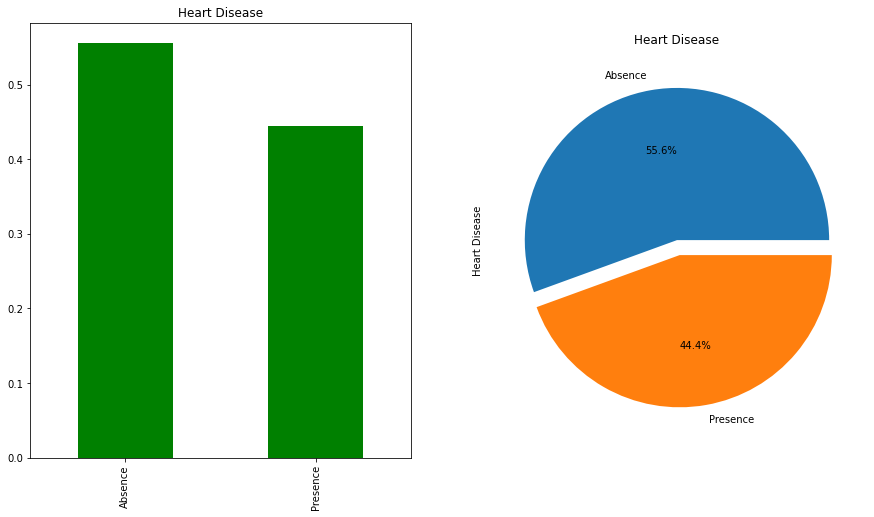

In [70]:
plt.figure(figsize=(15, 8)) 
plt.subplot(1,2,1)
df['Heart Disease'].value_counts(normalize = True).plot(kind = 'bar', color = 'green')
plt.title('Heart Disease')
plt.subplot(1,2,2)
plt.title('Heart Disease')
df['Heart Disease'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', explode = [0, 0.1])
plt.show()

The output is the graphical representation showing Bar  Graph and a Pie chart describing the information of Presence and Absence of Heart Disease. The Bar Graph shows the percentage of Heart Disease on Y-axis and attributes of Heart Disease on X-axis.
The Pie chart shows the same information with Absence with 55.6% while Presence of Heart Disease with 44.4%.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

The Output shows dataset with total of 270 data entires divided into 14 columns. The output also shows that there are zero null values in the dataset. With Heart Disease as Target variable. 

In [72]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Exploratory Data Analysis(EDA)

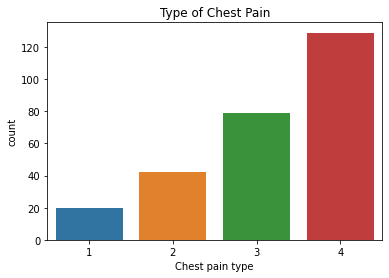

In [73]:
sns.countplot(df["Chest pain type"])
plt.title('Type of Chest Pain')
plt.show()

The output Bar Graph represents the variety of chest pain and count of it. X-axis represents the Type of chest pain and Y-axis represents Count of it.

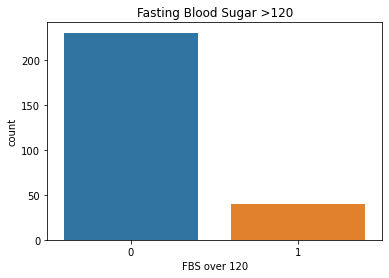

In [74]:
sns.countplot(df["FBS over 120"])
plt.title('Fasting Blood Sugar >120')
plt.show()

The Output bar graph here represents count of people with FBS>120 where 1 represents FBS>120 and 0 represents FBS<120. Here, X-axis is represented by the value of FBS and Y-axis is represented by Count 

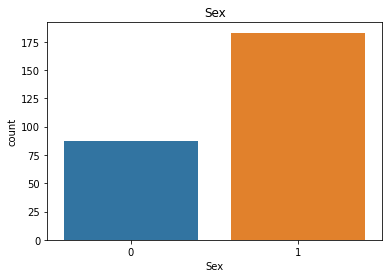

In [75]:
sns.countplot(df["Sex"])
plt.title('Sex')
plt.show()

Here the output shows, the relation for Sex and Count of Heart disease having 1 as 'Male' and 0 as 'Female'. We can observe that male tend to have more chance to get Heart Disease when compared to female.

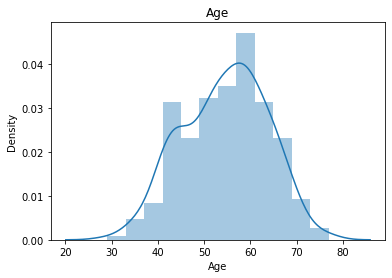

In [76]:
sns.distplot(df['Age'])
plt.title('Age')
plt.show()

The output is a Histogram represetation that explains the distribution of heart disease as per Age and Density of Disease having 'Age' on X-axis and 'Density' on Y-axis. By thus representation we can say that people between age groups 40-65 have high risk of Heart Disease.

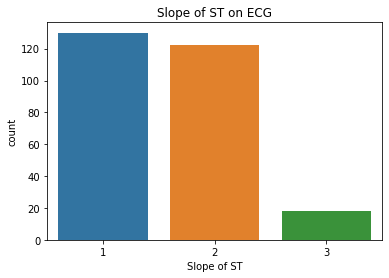

In [77]:
sns.countplot(df["Slope of ST"])
plt.title('Slope of ST on ECG')
plt.show()

The out is the Bar Graph representation of distribution of data between slope of ST and Count of Heart Disease. On x-axis, 1,2 and 3 represent Downsloping, Flat, and Upsloping respectively.

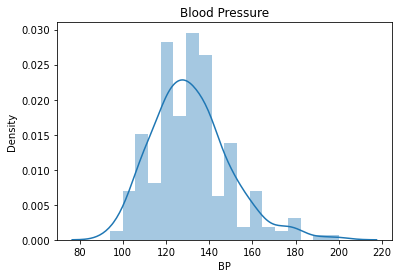

In [78]:
sns.distplot(df['BP'])
plt.title('Blood Pressure')
plt.show()

This plot represents the distribution of Blood pressure. In this case, we can say that the peak is between 120-130mm Hg with density between 0.020-0.025. We can also say that patients with High blood pressure are more from the dataset.

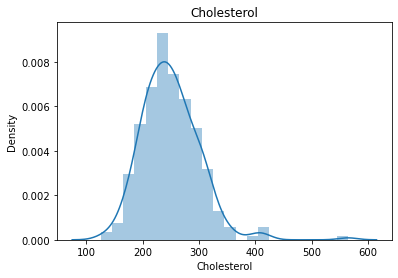

In [79]:
sns.distplot(df['Cholesterol'])
plt.title('Cholesterol')
plt.show()

The output histogram represents values of cholesterol with peak between 200-250mg/dl. With peak distribution we can say that according to the dataset, there are more patients with high cholesterol levels.

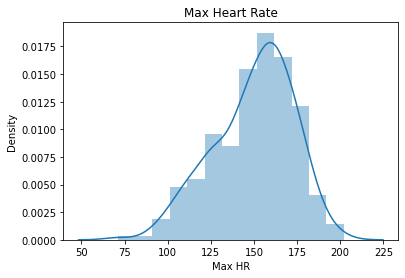

In [80]:
sns.distplot(df['Max HR'])
plt.title('Max Heart Rate')
plt.show()

The Histogram represents the values of patients with Maximum Heart Rate. From the graph we can say that the distribution with peak between 150-170 Bpm is high. This plot also represents that patients with Max HR are less.

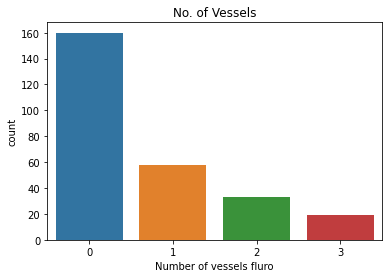

In [81]:
sns.countplot(df["Number of vessels fluro"])
plt.title('No. of Vessels')
plt.show()

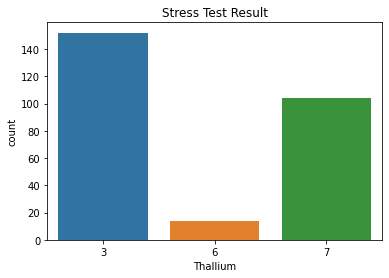

In [82]:
sns.countplot(df["Thallium"])
plt.title('Stress Test Result')
plt.show()

# Scatter Plot Representations

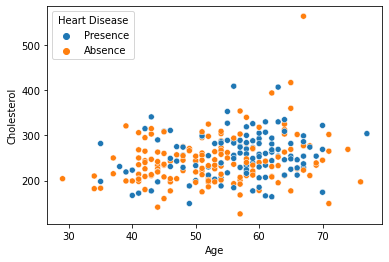

In [83]:
sns.scatterplot(df['Age'],df['Cholesterol'],hue = df['Heart Disease'])
plt.show()

The out Scatter Plot represents the relation between Age and Cholesterol and Heart Disease. By this plot we can say that patients in between age group 55-70 have high cholesterol and there is high chace of presence of Heart disease in them.

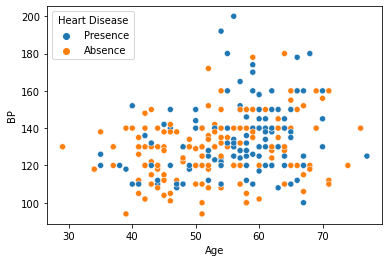

In [84]:
sns.scatterplot(df['Age'],df['BP'],hue = df['Heart Disease'])
plt.show()

The out Scatter Plot represents the relation between Age and BP and Heart Disease. Using this plot we can say that patiets with Heart disease present tend to have high BP levels. But, by this scatter plot it is difficult to predict Heart Disease using just the levels of BP.

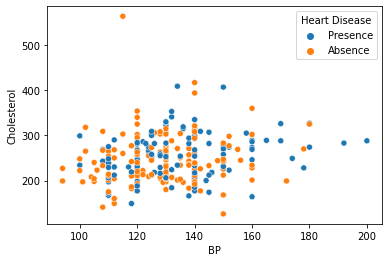

In [85]:
sns.scatterplot(df['BP'],df['Cholesterol'],hue = df['Heart Disease'])
plt.show()

The above scatter plot represents the relation between BP, Cholesterol adn Heart Disease. From the plot, we can say that BP and Cholesterol are highly correlated and Heart Disease can be present in patients with High BP and Cholesterol

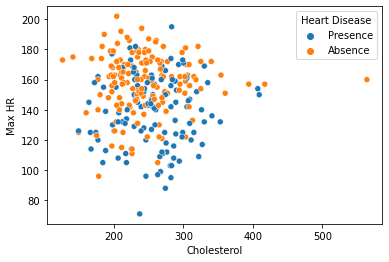

In [86]:
sns.scatterplot(df['Cholesterol'],df['Max HR'],hue = df['Heart Disease'])
plt.show()

The Output Scatter plot represents relation between Cholesterol, Max Heart RAte and Heart Disease. This plot shows that the patients with heart disease can have high cholesterol when compared to patients without heart disease.

# HEAT MAP

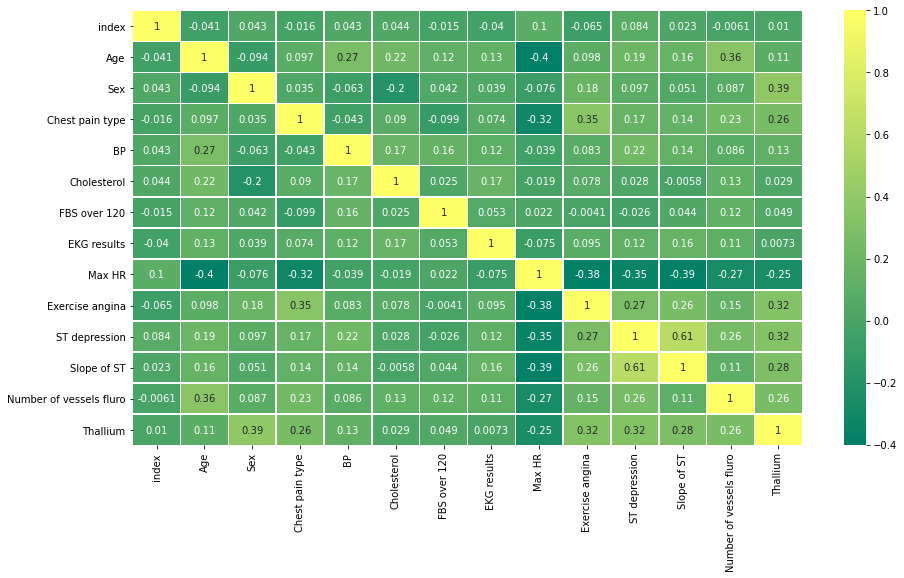

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap='summer')
plt.show()

# ENCODING DATA

In [88]:
encoder = LabelEncoder()
df["Heart Disease"] = encoder.fit_transform(df["Heart Disease"])

In [89]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [90]:
scaler = StandardScaler()
df[["BP", "Cholesterol", "Max HR"]] = scaler.fit_transform(df[["BP", "Cholesterol", "Max HR"]])

In [91]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,-0.075410,1.402212,0,2,-1.759208,0,2.4,2,3,3,1
1,1,67,0,3,-0.916759,6.093004,0,2,0.446409,0,1.6,2,0,7,0
2,2,57,1,2,-0.411950,0.219823,0,0,-0.375291,0,0.3,1,0,7,1
3,3,64,1,4,-0.187590,0.258589,0,0,-1.932198,1,0.2,2,1,7,0
4,4,74,0,2,-0.636310,0.374890,0,2,-1.240239,1,0.2,1,1,3,0


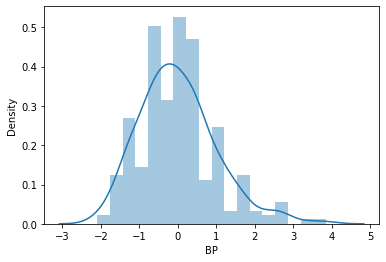

In [92]:
sns.distplot(df['BP'])
plt.show()

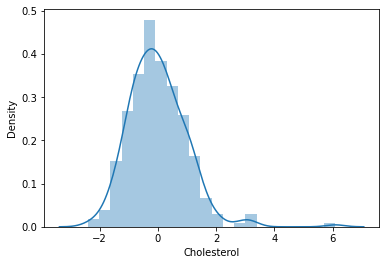

In [93]:
sns.distplot(df['Cholesterol'])
plt.show()

In [94]:
df=df.drop('Max HR', axis=1)

In [95]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,-0.075410,1.402212,0,2,0,2.4,2,3,3,1
1,1,67,0,3,-0.916759,6.093004,0,2,0,1.6,2,0,7,0
2,2,57,1,2,-0.411950,0.219823,0,0,0,0.3,1,0,7,1
3,3,64,1,4,-0.187590,0.258589,0,0,1,0.2,2,1,7,0
4,4,74,0,2,-0.636310,0.374890,0,2,1,0.2,1,1,3,0


In [96]:
y=df['Heart Disease']
x=df.drop('Heart Disease', axis=1)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
print('The shape of the x_train:',x_train.shape)
print('The shape of the x_test:',x_test.shape)
print('The shape of the y_train:',y_train.shape)
print('The shape of the y_test:',y_test.shape)

The shape of the x_train: (189, 13)
The shape of the x_test: (81, 13)
The shape of the y_train: (189,)
The shape of the y_test: (81,)


In [98]:
lr = LogisticRegression(solver='saga')
df_lr = lr.fit(x_train, y_train)
df_lr_pred_test = df_lr.predict(x_test)
df_lr_pred_train = df_lr.predict(x_train)
df_lr_prob = df_lr.predict_proba(x_test)[:,1]

In [99]:
lr_acc_score_test = print('The test accuracy score of Logistic Regression is: ', accuracy_score(y_test,df_lr_pred_test)*100)
lr_acc_score_test

The test accuracy score of Logistic Regression is:  74.07407407407408


In [100]:
lr_acc_score_train = print('The train accuracy score of Logistic Regression is: ', accuracy_score(y_train,df_lr_pred_train)*100)
lr_acc_score_train

The train accuracy score of Logistic Regression is:  77.24867724867724


In [101]:
print('The f1 score of Logistic Regression is: ', f1_score(y_test,df_lr_pred_test)*100)

The f1 score of Logistic Regression is:  69.56521739130434


Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.92      0.77        39
           1       0.89      0.57      0.70        42

    accuracy                           0.74        81
   macro avg       0.78      0.75      0.73        81
weighted avg       0.78      0.74      0.73        81

confusion matrix : 
 [[36  3]
 [18 24]]


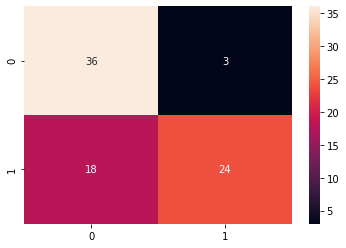

In [102]:
print('Classification report : \n',classification_report(y_test,df_lr_pred_test))
print('confusion matrix : \n',confusion_matrix(y_test,df_lr_pred_test))
sns.heatmap(confusion_matrix(y_test,df_lr_pred_test), annot = True)
plt.show()

In [103]:
dtc = DecisionTreeClassifier()
df_dtc = dtc.fit(x_train, y_train)
df_dtc_pred_test = df_dtc.predict(x_test)
df_dtc_pred_train = df_dtc.predict(x_train)
df_dtc_prob = df_dtc.predict_proba(x_test)[:,1]

In [104]:
dtc_acc_score_test = print('The test accuracy score of Decision Tree is: ', accuracy_score(y_test,df_dtc_pred_test)*100)
dtc_acc_score_test

The test accuracy score of Decision Tree is:  77.77777777777779


In [105]:
dtc_acc_score_train = print('The train accuracy score of Decision Tree is: ', accuracy_score(y_train,df_dtc_pred_train)*100)
dtc_acc_score_train

The train accuracy score of Decision Tree is:  100.0


In [106]:
print('The f1 score of Decision Tree is: ', f1_score(y_test,df_dtc_pred_test)*100)

The f1 score of Decision Tree is:  79.54545454545455


Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.72      0.76        39
           1       0.76      0.83      0.80        42

    accuracy                           0.78        81
   macro avg       0.78      0.78      0.78        81
weighted avg       0.78      0.78      0.78        81

confusion matrix : 
 [[28 11]
 [ 7 35]]


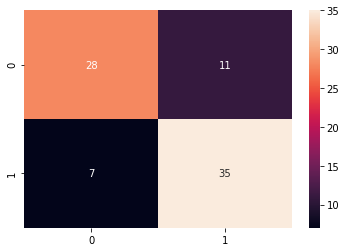

In [107]:
print('Classification report : \n',classification_report(y_test,df_dtc_pred_test))
print('confusion matrix : \n',confusion_matrix(y_test,df_dtc_pred_test))
sns.heatmap(confusion_matrix(y_test,df_dtc_pred_test), annot = True)
plt.show()

In [108]:
rfc = RandomForestClassifier()
df_rfc = rfc.fit(x_train, y_train)
df_rfc_pred_test = df_rfc.predict(x_test)
df_rfc_pred_train = df_rfc.predict(x_train)
df_rfc_prob = df_rfc.predict_proba(x_test)[:,1]

In [109]:
rfc_acc_score_test = print('The test accuracy score of Random Forrest is: ', accuracy_score(y_test,df_rfc_pred_test)*100)
rfc_acc_score_test

The test accuracy score of Random Forrest is:  83.9506172839506


In [110]:
rfc_acc_score_train = print('The train accuracy score of Random Forrest is: ', accuracy_score(y_train,df_rfc_pred_train)*100)
rfc_acc_score_train

The train accuracy score of Random Forrest is:  100.0


In [111]:
print('The f1 score of Random Forrest is: ', f1_score(y_test,df_rfc_pred_test)*100)

The f1 score of Random Forrest is:  83.54430379746834


Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.89      0.79      0.84        42

    accuracy                           0.84        81
   macro avg       0.84      0.84      0.84        81
weighted avg       0.85      0.84      0.84        81

confusion matrix : 
 [[35  4]
 [ 9 33]]


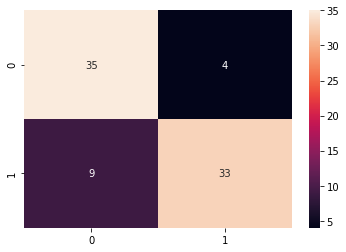

In [112]:
print('Classification report : \n',classification_report(y_test,df_rfc_pred_test))
print('confusion matrix : \n',confusion_matrix(y_test,df_rfc_pred_test))
sns.heatmap(confusion_matrix(y_test,df_rfc_pred_test), annot = True)
plt.show()

In [113]:
knn = KNeighborsClassifier()
df_knn = knn.fit(x_train, y_train)
df_knn_pred_test = df_knn.predict(x_test)
df_knn_pred_train = df_knn.predict(x_train)
df_knn_prob = df_knn.predict_proba(x_test)[:,1]

In [114]:
knn_acc_score_test = print('The test accuracy score of KNN is: ', accuracy_score(y_test,df_knn_pred_test)*100)
knn_acc_score_test

The test accuracy score of KNN is:  53.086419753086425


In [115]:
knn_acc_score_train = print('The train accuracy score of KNN is: ', accuracy_score(y_train,df_knn_pred_train)*100)
knn_acc_score_train

The train accuracy score of KNN is:  75.13227513227513


In [116]:
print('The f1 score of KNN is: ', f1_score(y_test,df_knn_pred_test)*100)

The f1 score of KNN is:  53.658536585365844


Classification report : 
               precision    recall  f1-score   support

           0       0.51      0.54      0.53        39
           1       0.55      0.52      0.54        42

    accuracy                           0.53        81
   macro avg       0.53      0.53      0.53        81
weighted avg       0.53      0.53      0.53        81

confusion matrix : 
 [[21 18]
 [20 22]]


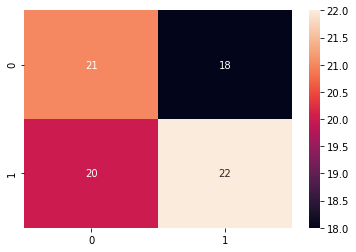

In [117]:
print('Classification report : \n',classification_report(y_test,df_knn_pred_test))
print('confusion matrix : \n',confusion_matrix(y_test,df_knn_pred_test))
sns.heatmap(confusion_matrix(y_test,df_knn_pred_test), annot = True)
plt.show()

# HYPERPARAMETER TUNING

# Logistic Regression

In [150]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
best_lr = grid_search.best_estimator_
best_lr_pred_test = best_lr.predict(x_test)
best_lr_pred_train = best_lr.predict(x_train)
best_lr_prob = best_lr.predict_proba(x_test)[:,1]
best_lr_acc_score_test = accuracy_score(y_test,best_lr_pred_test)*100
best_lr_acc_score_train = accuracy_score(y_train,best_lr_pred_train)*100
print('The test accuracy score of Logistic Regression is: ', best_lr_acc_score_test)
print('The train accuracy score of Logistic Regression is: ', best_lr_acc_score_train)
print('The f1 score of Logistic Regression is: ', f1_score(y_test,best_lr_pred_test)*100)

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:  0.8257467994310099
The test accuracy score of Logistic Regression is:  80.24691358024691
The train accuracy score of Logistic Regression is:  84.65608465608466
The f1 score of Logistic Regression is:  80.0



# RANDOM FORREST

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rfc = RandomForestClassifier()
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None] + list(randint(3, 20).rvs(5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(x_train, y_train)
print('Best hyperparameters: ', random_search.best_params_)
best_rfc = random_search.best_estimator_
best_rfc_pred_test = best_rfc.predict(x_test)
best_rfc_pred_train = best_rfc.predict(x_train)
best_rfc_prob = best_rfc.predict_proba(x_test)[:,1]
best_rfc_acc_score_test = accuracy_score(y_test,best_rfc_pred_test)*100
best_rfc_acc_score_train = accuracy_score(y_train,best_rfc_pred_train)*100
print('The test accuracy score of Random Forest is: ', best_rfc_acc_score_test)
print('The train accuracy score of Random Forest is: ', best_rfc_acc_score_train)
print('The f1 score of Random Forest is: ', f1_score(y_test,best_rfc_pred_test)*100)

Best hyperparameters:  {'bootstrap': False, 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 230}
The test accuracy score of Random Forest is:  86.41975308641975
The train accuracy score of Random Forest is:  95.23809523809523
The f1 score of Random Forest is:  86.41975308641975


# Decision Tree

In [145]:
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best hyperparameters: ', grid_search.best_params_)
best_dtc = grid_search.best_estimator_
best_dtc_pred_test = best_dtc.predict(x_test)
best_dtc_pred_train = best_dtc.predict(x_train)
best_dtc_prob = best_dtc.predict_proba(x_test)[:,1]
best_dtc_acc_score_test = accuracy_score(y_test,best_dtc_pred_test)*100
best_dtc_acc_score_train = accuracy_score(y_train,best_dtc_pred_train)*100
print('The test accuracy score of Decision Tree is: ', best_dtc_acc_score_test)
print('The train accuracy score of Decision Tree is: ', best_dtc_acc_score_train)
print('The f1 score of Decision Tree is: ', f1_score(y_test,best_dtc_pred_test)*100)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}
The test accuracy score of Decision Tree is:  81.48148148148148
The train accuracy score of Decision Tree is:  88.88888888888889
The f1 score of Decision Tree is:  79.45205479452055


# KNeighborsClassifier

In [148]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
best_knn = grid_search.best_estimator_
best_knn_pred_test = best_knn.predict(x_test)
best_knn_pred_train = best_knn.predict(x_train)
best_knn_prob = best_knn.predict_proba(x_test)[:,1]
best_knn_acc_score_test = accuracy_score(y_test,best_knn_pred_test)*100
best_knn_acc_score_train = accuracy_score(y_train,best_knn_pred_train)*100
print('The test accuracy score of KNN is: ', best_knn_acc_score_test)
print('The train accuracy score of KNN is: ', best_knn_acc_score_train)
print('The f1 score of KNN is: ', f1_score(y_test,best_knn_pred_test)*100)

Best parameters:  {'n_neighbors': 3}
Best score:  0.5608819345661451
The test accuracy score of KNN is:  54.32098765432099
The train accuracy score of KNN is:  79.36507936507937
The f1 score of KNN is:  50.66666666666667
